In [20]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
raw_data = loadarff("rawData/albrecht.arff")
df_data = pd.DataFrame(raw_data[0])
print(df_data.head())

   Input  Output  Inquiry  File  FPAdj  RawFPcounts   AdjFP  Effort
0   25.0   150.0     75.0  60.0   1.00      1750.00  1750.0   102.4
1  193.0    98.0     70.0  36.0   1.00      1902.00  1902.0   105.2
2   70.0    27.0      0.0  12.0   0.80       535.00   428.0    11.1
3   40.0    60.0     20.0  12.0   1.15       660.00   759.0    21.1
4   10.0    69.0      1.0   9.0   0.90       478.89   431.0    28.8


1. Conversion to Numerical Data

In [12]:
df_data = df_data.astype(dtype={
    'Input': np.int32,
    'Output': np.int32,
    'Inquiry': np.int32,
    'File': np.int32,
    'FPAdj': np.double,
    'RawFPcounts': np.double,
    'AdjFP': np.int32,
    'Effort': np.double,
    })
print(df_data.dtypes)
print(df_data.head())

Input            int32
Output           int32
Inquiry          int32
File             int32
FPAdj          float64
RawFPcounts    float64
AdjFP            int32
Effort         float64
dtype: object
   Input  Output  Inquiry  File  FPAdj  RawFPcounts  AdjFP  Effort
0     25     150       75    60   1.00      1750.00   1750   102.4
1    193      98       70    36   1.00      1902.00   1902   105.2
2     70      27        0    12   0.80       535.00    428    11.1
3     40      60       20    12   1.15       660.00    759    21.1
4     10      69        1     9   0.90       478.89    431    28.8


2. Sequential Conversion and Time Indexing

3. Missing Data Processing

In [13]:
missing_values = df_data.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values")
else:
    print("Have missing values")
    numeric_columns = df_data.select_dtypes(include=[np.number]).columns
    numeric_columns = [col for col in numeric_columns]
    df_data[numeric_columns] = df_data[numeric_columns].fillna(df_data[numeric_columns].mean())

No missing values


4. Outlier Treatment

In [14]:
print(df_data.mean())

Input           40.250000
Output          47.250000
Inquiry         16.875000
File            17.375000
FPAdj            0.989583
RawFPcounts    638.539583
AdjFP          647.625000
Effort          21.875000
dtype: float64


In [15]:
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

numerical_cols = df_data.columns

for col in numerical_cols:
    df_data = treat_outliers_iqr(df_data, col)

print(df_data.mean())


Input           35.302083
Output          46.562500
Inquiry         14.645833
File            16.708333
FPAdj            0.989583
RawFPcounts    585.229896
AdjFP          598.005208
Effort          15.435417
dtype: float64


5. Data Visualization for Correlation

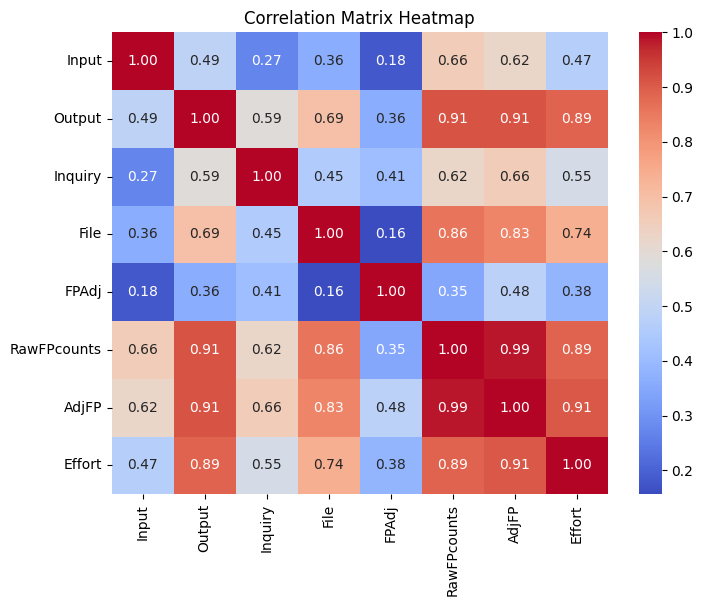

In [16]:
correlation_matrix = df_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
df_data = df_data.drop(columns='AdjFP')

6. Data Splitting (Partitioning)

In [19]:
X = df_data.drop(columns=['Effort'])  
y = df_data['Effort']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Data Scaling

In [22]:
print("\nData Standardization (StandardScaler)")
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nStatistics before standardization (X_train):")
print(X_train.describe().T[['mean', 'std']])

print("\nStatistics after standardization (X_train_scaled):")
print(X_train_scaled_df.describe().T[['mean', 'std']])


Data Standardization (StandardScaler)

Statistics before standardization (X_train):
                   mean         std
Input         34.434211   21.279203
Output        41.052632   29.362625
Inquiry       13.618421   12.706726
File          14.789474   11.118448
FPAdj          0.989474    0.133935
RawFPcounts  535.721842  298.542093

Statistics after standardization (X_train_scaled):
                     mean       std
Input        1.144917e-16  1.027402
Output      -6.427607e-17  1.027402
Inquiry     -1.168656e-17  1.027402
File         0.000000e+00  1.027402
FPAdj       -5.375817e-16  1.027402
RawFPcounts  7.596263e-17  1.027402


8. Inverse Transformation

In [23]:
print("\nInverse Transformation")

X_train_original = scaler_X.inverse_transform(X_train_scaled)
y_train_original = scaler_y.inverse_transform(y_train_scaled)

X_train_original_df = pd.DataFrame(X_train_original, columns=X_train.columns, index=X_train.index)

print("\n=== X_train data after inverse transformation (original scale) ===")
print(pd.DataFrame(X_train_original, columns=X_train.columns).head())

print("\n=== y_train target after inverse transformation ===")
print(y_train_original[:5].flatten())


Inverse Transformation

=== X_train data after inverse transformation (original scale) ===
   Input  Output       Inquiry  File  FPAdj  RawFPcounts
0  40.00    60.0  2.000000e+01  15.0   1.15     690.4300
1  43.00    40.0  2.000000e+01  35.0   0.85     802.3500
2  74.25    98.0  4.575000e+01  36.0   1.00    1227.5225
3  61.00    68.0 -1.776357e-15  11.0   1.00     694.0000
4  13.00    19.0 -1.776357e-15  23.0   0.75     377.3300

=== y_train target after inverse transformation ===
[19.     12.     38.0875 11.8    10.    ]


In [24]:
df_data.to_csv("cleanedData/albrecht_processed.csv", index=True)